<a href="https://colab.research.google.com/github/VilasSonawane/Bank-Marketing-Effectiveness-Prediction-Model/blob/main/Copy_Capstone_Project_on_Bank_Marketing_Effectiveness_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

In [138]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# **Import Dataset**

In [139]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [140]:
# Importing the dataset
bank_df = pd.read_csv('/content/drive/MyDrive/Bank Marketing Effectiveness Prediction/Data & Resources/bank-full.csv' ,sep =';')
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# **Data Inspection**

In [141]:
bank_df.shape

(45211, 17)

In [142]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [143]:
bank_df.describe(include = "all")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


# **Exploratary Data Analysis**

In [144]:
bank_df.isnull().sum().sort_values(ascending = False)

age          0
day          0
poutcome     0
previous     0
pdays        0
campaign     0
duration     0
month        0
contact      0
job          0
loan         0
housing      0
balance      0
default      0
education    0
marital      0
y            0
dtype: int64

In [145]:
# find categorical variables
categorical = [var for var in bank_df.columns if bank_df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))
categorical

There are 10 categorical variables


['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [146]:
# find Numerical variables
numerical = [var for var in bank_df.columns if bank_df[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))
numerical

There are 7 numerical variables


['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [147]:
# Value Counts of Categarical Features
for var in categorical:
  print('--'*50)
  print(f'Value Counts of Feature {var}')
  print(bank_df[var].value_counts())
  print('--'*50)
  print(f' % Value Counts of Feature {var}')
  print(bank_df[var].value_counts()/ np.float(len(bank_df)) )
  print()

----------------------------------------------------------------------------------------------------
Value Counts of Feature job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
----------------------------------------------------------------------------------------------------
 % Value Counts of Feature job
blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: job, dtype: float64

----------------------------------------------------------------------------------------------------
Value Count

In [148]:
# No of Unique Values in Numarical Features
for var in numerical:
  print('--'*50)
  print(f' Unique values of Feature {var}')
  print(bank_df[var].unique())
  print()

----------------------------------------------------------------------------------------------------
 Unique values of Feature age
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]

----------------------------------------------------------------------------------------------------
 Unique values of Feature balance
[ 2143    29     2 ...  8205 14204 16353]

----------------------------------------------------------------------------------------------------
 Unique values of Feature day
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]

----------------------------------------------------------------------------------------------------
 Unique values of Feature duration
[ 261  151   76 ... 1298 1246 1556]

-----------------------------------------------------

# **Univariate Analysis**

In [149]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [150]:
# bank_df['y'] = bank_df['y'].map({'no':0,'yes':1})

# **Numarical Features**

# **1. Age**

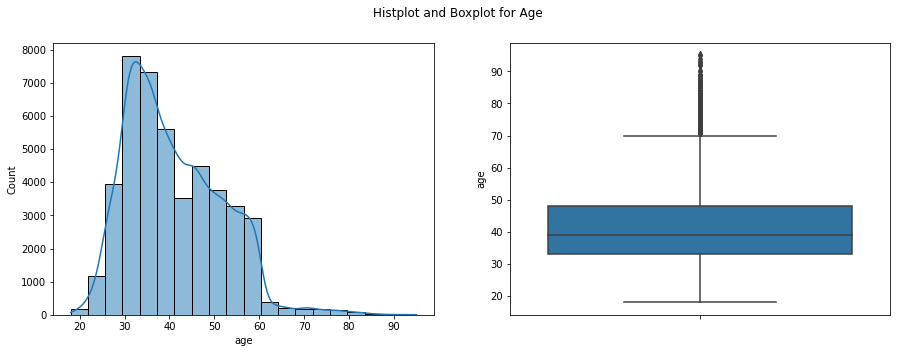

In [151]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Histplot and Boxplot for Age')
# HIstplot
sns.histplot(ax=axes[0], data=bank_df, x="age", bins=20,kde=True)
# BoxPlot
sns.boxplot(ax=axes[1],data=bank_df, y="age")



In [152]:
# for var in numerical:
#   fig, axes = plt.subplots(1, 2, figsize=(15, 5))
#   fig.suptitle('Histplot and Boxplot for Age')
# # HIstplot
#   sns.histplot(ax=axes[0], data=bank_df, x= var, bins=20,kde=True)
# # BoxPlot
#   sns.boxplot(ax=axes[1],data=bank_df, y= var)


# **2. balance**

In [153]:
print(bank_df.balance.unique().tolist())

[2143, 29, 2, 1506, 1, 231, 447, 121, 593, 270, 390, 6, 71, 162, 229, 13, 52, 60, 0, 723, 779, 23, 50, -372, 255, 113, -246, 265, 839, 378, 39, 10635, 63, -7, -3, 506, 2586, 49, 104, 529, 96, -171, -364, 1291, -244, -76, -103, 243, 424, 306, 24, 179, 989, 249, 790, 154, 6530, 100, 59, 1205, 12223, 5935, 25, 282, 1937, 384, 582, 91, 206, 164, 690, 2343, 137, 173, 45, 1270, 16, 486, 152, 290, 54, -37, 101, 383, 81, -674, 90, 128, 151, 61, 30, 523, 31, 79, -34, 448, 144, 351, -67, 262, 56, 26, 3, 41, 7, 105, 818, -16, 2476, 1185, 217, 1685, 802, 94, 517, 947, 42, 37, 57, 22, 8, 293, 348, -19, -4, 18, 139, 1883, 216, 782, 904, 1705, 47, 176, 1225, 86, 82, 271, 1378, 184, 1357, 19, 434, 92, 1151, 51, 214, 1161, 787, 253, 211, 235, 4384, 4080, 53, 2127, 377, 73, 445, 307, 155, 400, 1428, 219, 575, 298, 5699, 257, -390, 330, 195, 301, -41, 483, 28, 965, 324, -69, 205, 278, 1065, 34, 1033, 1467, -12, 388, 294, 1827, 627, 315, 66, -9, 349, 3237, 275, 207, 2248, 428, 140, 297, 279, 901, 2573, 14

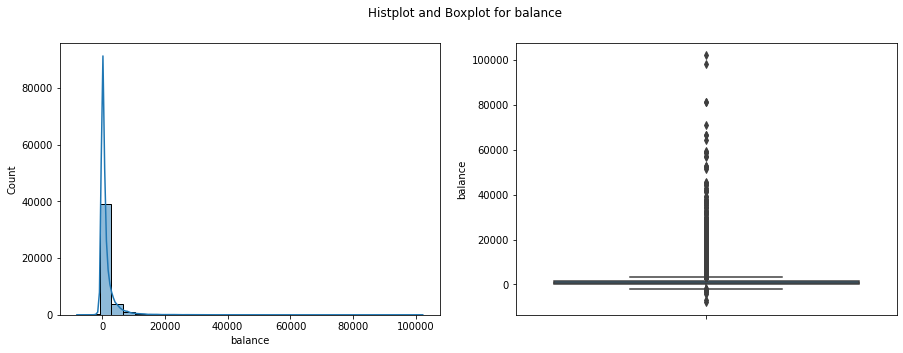

In [154]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Histplot and Boxplot for balance')
# HIstplot
sns.histplot(ax=axes[0], data=bank_df, x="balance", bins=30,kde=True)
# BoxPlot
sns.boxplot(ax=axes[1],data=bank_df, y="balance")

# **3. Day**

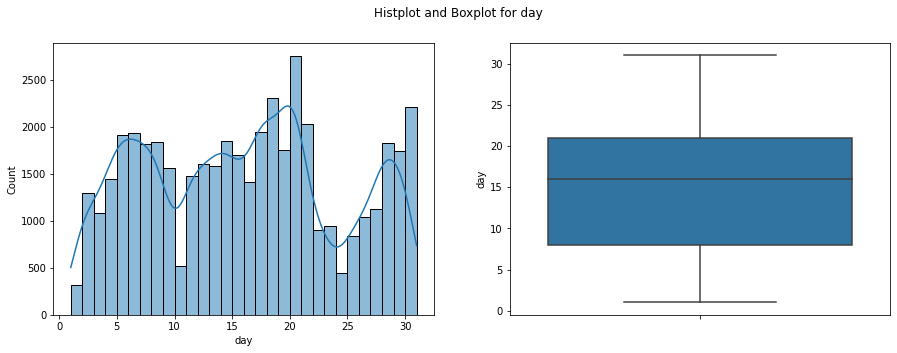

In [155]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Histplot and Boxplot for day')
# HIstplot
sns.histplot(ax=axes[0], data=bank_df, x="day", bins=30,kde=True)
# BoxPlot
sns.boxplot(ax=axes[1],data=bank_df, y="day")

# **4.Duration**

In [156]:
print(bank_df.duration.unique().tolist())

[261, 151, 76, 92, 198, 139, 217, 380, 50, 55, 222, 137, 517, 71, 174, 353, 98, 38, 219, 54, 262, 164, 160, 342, 181, 172, 296, 127, 255, 348, 225, 230, 208, 226, 336, 242, 365, 1666, 577, 180, 22, 1492, 616, 355, 363, 266, 253, 179, 787, 145, 104, 13, 185, 1778, 138, 812, 391, 357, 91, 528, 273, 158, 177, 258, 154, 291, 176, 211, 349, 272, 193, 212, 20, 1042, 246, 529, 1467, 1389, 188, 48, 213, 583, 221, 173, 426, 287, 101, 203, 197, 257, 124, 229, 400, 190, 21, 514, 849, 194, 144, 286, 107, 247, 518, 364, 178, 439, 79, 120, 175, 61, 78, 143, 579, 677, 345, 100, 125, 136, 73, 541, 163, 301, 46, 204, 157, 243, 186, 610, 2033, 85, 114, 57, 238, 93, 128, 303, 558, 270, 228, 99, 240, 673, 233, 1056, 250, 252, 130, 412, 19, 458, 717, 313, 683, 1077, 416, 146, 167, 315, 140, 346, 562, 142, 67, 309, 248, 256, 82, 477, 611, 471, 381, 42, 251, 408, 215, 216, 366, 210, 288, 168, 338, 410, 300, 1419, 27, 18, 730, 746, 121, 40, 206, 389, 702, 117, 232, 39, 282, 714, 227, 119, 361, 350, 332, 113, 

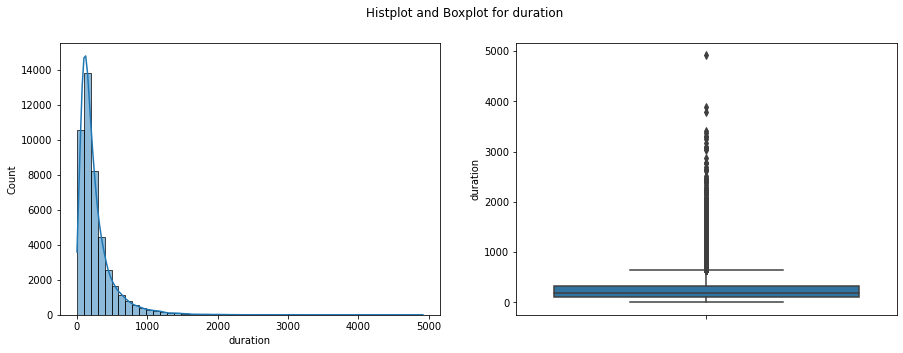

In [157]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Histplot and Boxplot for duration')
# HIstplot
sns.histplot(ax=axes[0], data=bank_df, x="duration", bins=50,kde=True)
# BoxPlot
sns.boxplot(ax=axes[1],data=bank_df, y="duration")

# **5.Campaign**

In [158]:
bank_df.campaign.unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44])

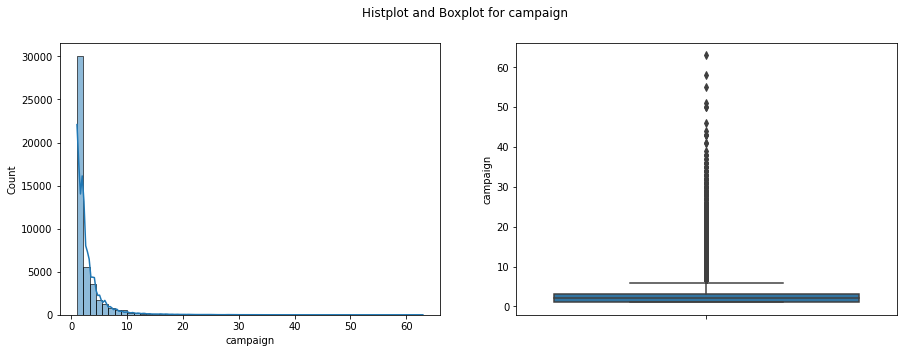

In [159]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Histplot and Boxplot for campaign')
# HIstplot
sns.histplot(ax=axes[0], data=bank_df, x="campaign", bins=55,kde=True)
# BoxPlot
sns.boxplot(ax=axes[1],data=bank_df, y="campaign")

# **6.Pdays**

In [160]:
print(bank_df.pdays.unique().tolist())

[-1, 151, 166, 91, 86, 143, 147, 89, 140, 176, 101, 174, 170, 167, 195, 165, 129, 188, 196, 172, 118, 119, 104, 171, 117, 164, 132, 131, 123, 159, 186, 111, 115, 116, 173, 178, 110, 152, 96, 103, 150, 175, 193, 181, 185, 154, 145, 138, 126, 180, 109, 158, 168, 97, 182, 127, 130, 194, 125, 105, 102, 26, 179, 28, 183, 155, 112, 120, 137, 124, 187, 190, 113, 162, 134, 169, 189, 8, 144, 191, 184, 177, 5, 99, 133, 93, 92, 10, 100, 156, 198, 106, 153, 146, 128, 7, 121, 160, 107, 90, 27, 197, 136, 139, 122, 157, 149, 135, 30, 114, 98, 192, 163, 34, 95, 141, 31, 199, 94, 108, 29, 268, 247, 253, 226, 244, 239, 245, 204, 231, 238, 258, 230, 254, 265, 71, 223, 246, 250, 266, 240, 205, 261, 259, 241, 260, 234, 251, 225, 161, 237, 262, 248, 255, 220, 227, 206, 224, 249, 235, 228, 263, 2, 270, 232, 252, 207, 200, 269, 233, 256, 273, 272, 242, 264, 208, 214, 222, 271, 203, 221, 202, 216, 201, 257, 229, 210, 217, 75, 213, 73, 76, 267, 211, 215, 77, 236, 82, 6, 209, 274, 1, 243, 212, 275, 80, 276, 9, 2

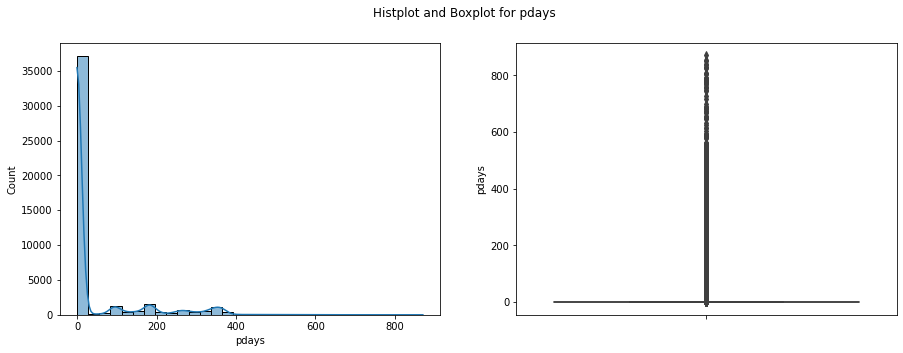

In [161]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Histplot and Boxplot for pdays')
# HIstplot
sns.histplot(ax=axes[0], data=bank_df, x="pdays", bins=31,kde=True)
# BoxPlot
sns.boxplot(ax=axes[1],data=bank_df, y="pdays")

# **7. previous**

In [162]:
print(bank_df.previous.unique().tolist())

[0, 3, 1, 4, 2, 11, 16, 6, 5, 10, 12, 7, 18, 9, 21, 8, 14, 15, 26, 37, 13, 25, 20, 27, 17, 23, 38, 29, 24, 51, 275, 22, 19, 30, 58, 28, 32, 40, 55, 35, 41]


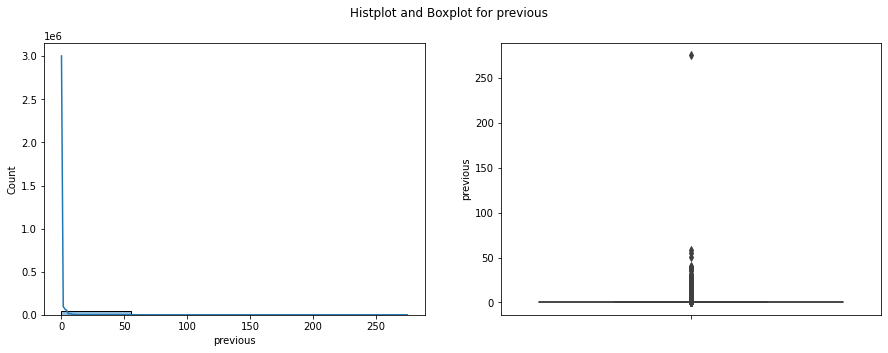

In [163]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Histplot and Boxplot for previous')
# HIstplot
sns.histplot(ax=axes[0], data=bank_df, x="previous", bins=5,kde=True)
# BoxPlot
sns.boxplot(ax=axes[1],data=bank_df, y="previous")

# **Categorical Features**

# **8. Job**

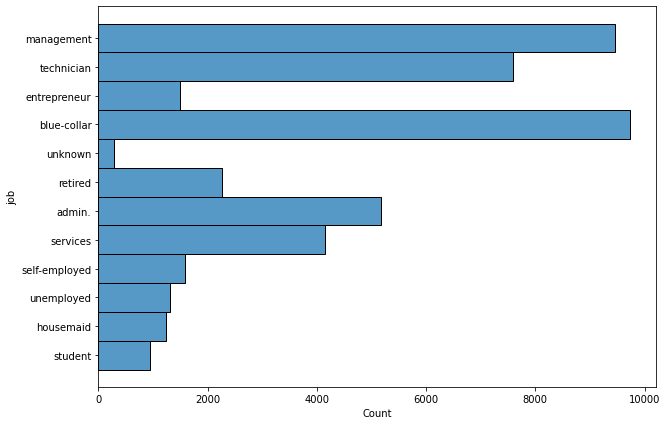

In [164]:
plt.figure(figsize=(10, 7))
sns.histplot(data=bank_df, y="job", palette="pastel")

# **9. marital**

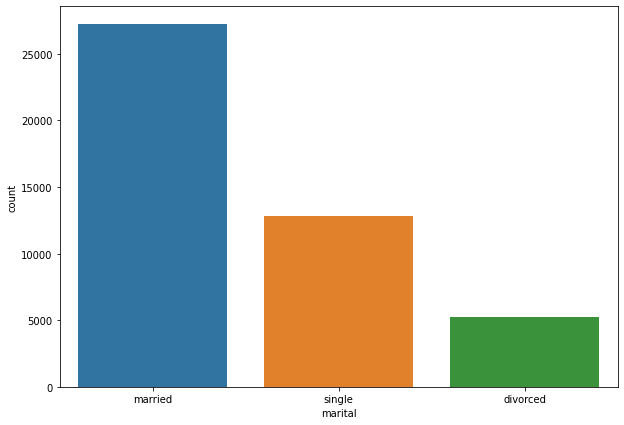

In [165]:
plt.figure(figsize=(10, 7))
sns.countplot(data=bank_df, x="marital")

# **10.education**	

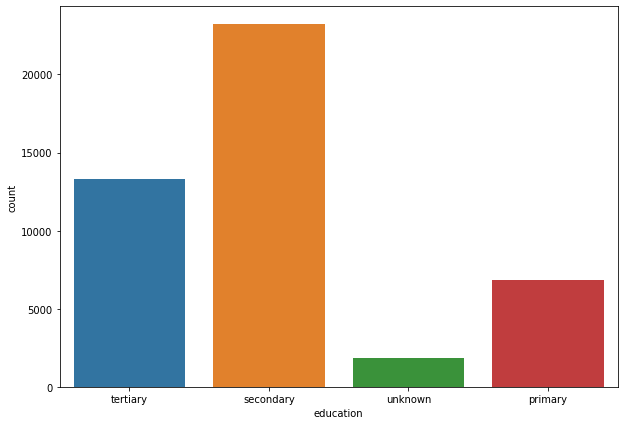

In [166]:
plt.figure(figsize=(10, 7))
sns.countplot(data=bank_df, x="education")

#**11.Value Counts for All Categorical variables**

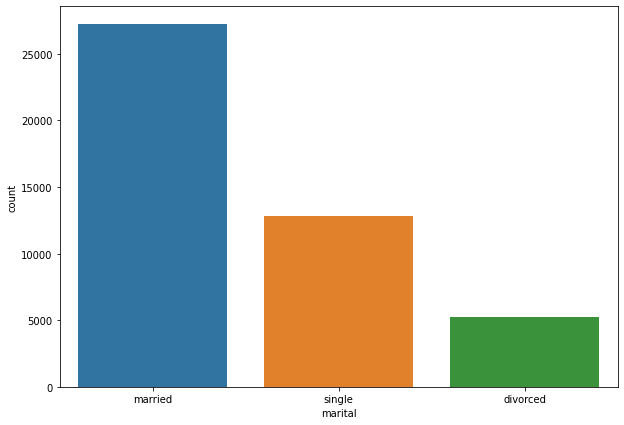

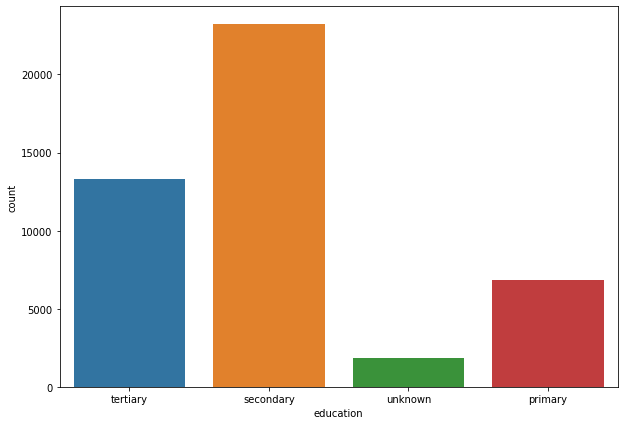

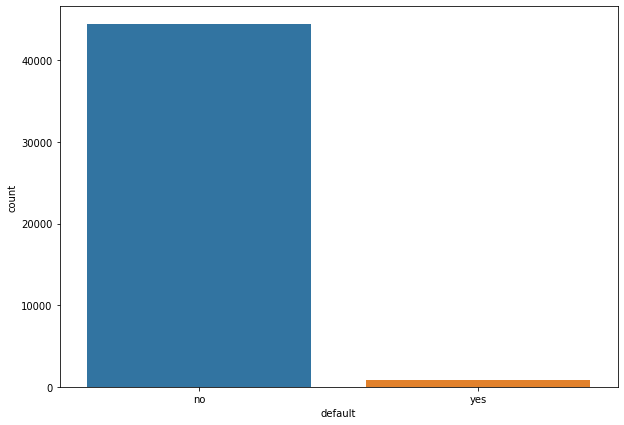

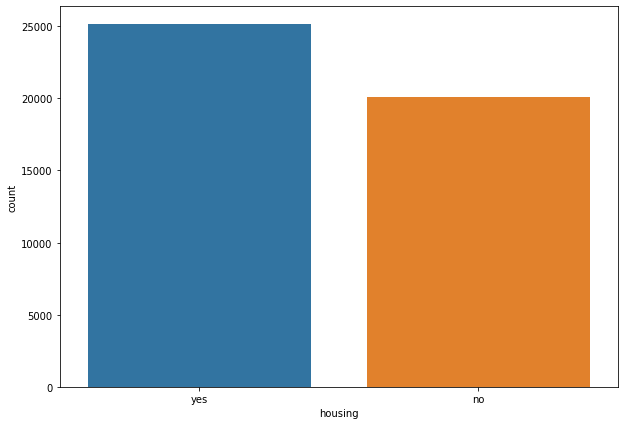

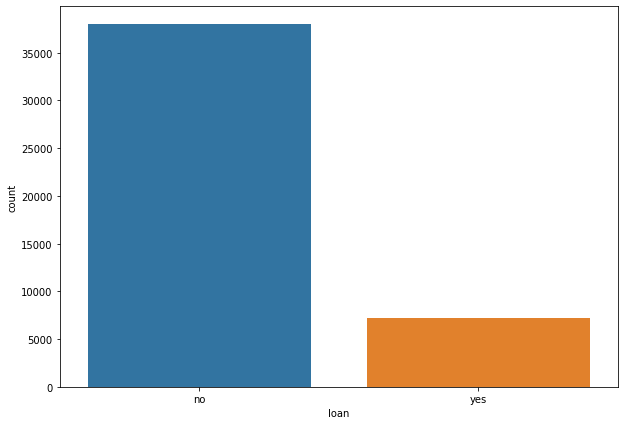

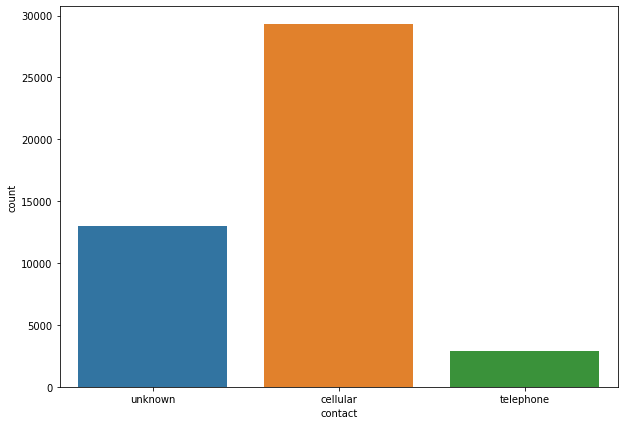

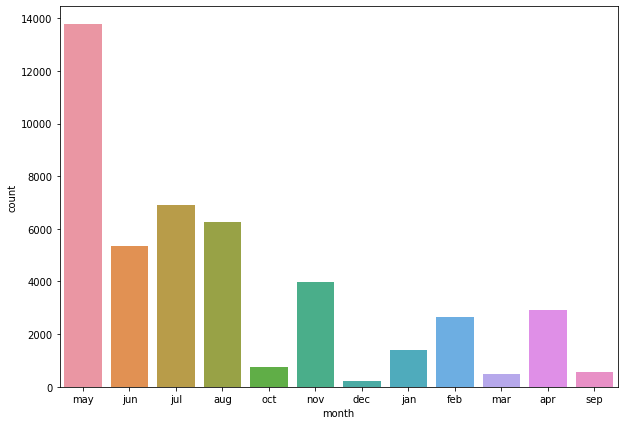

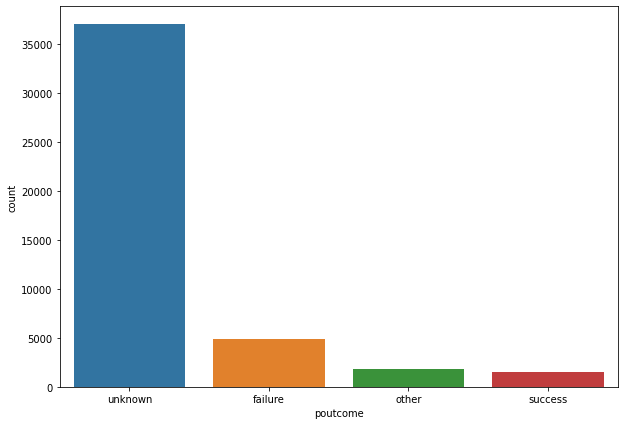

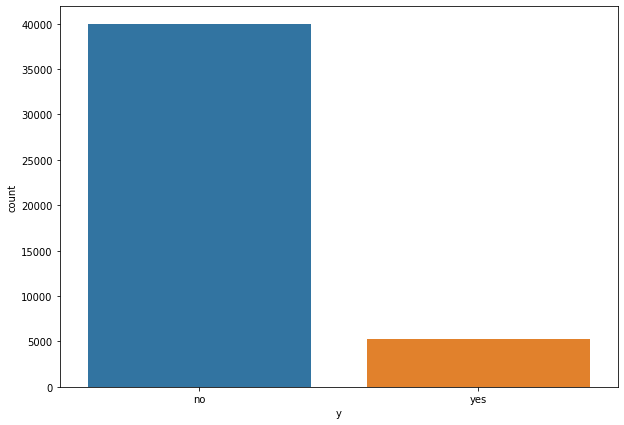

In [167]:
# Value Counts of Categarical Features
for var in categorical[1:]:
  plt.figure(figsize=(10, 7))
  sns.countplot(data=bank_df, x=var)

# **Bivariate Analysis**

In [168]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

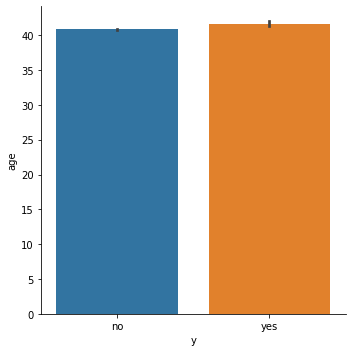

In [169]:
sns.catplot( y="age", x="y",kind="bar",data=bank_df)

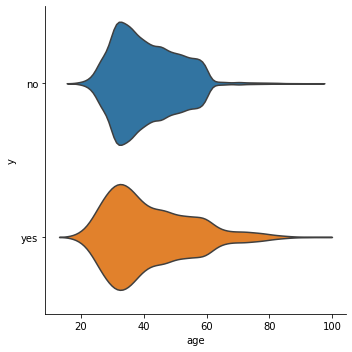

In [170]:
sns.catplot(x="age", y="y", kind="violin", inner=None, data=bank_df)


# **Multivariate Analyis**

1.

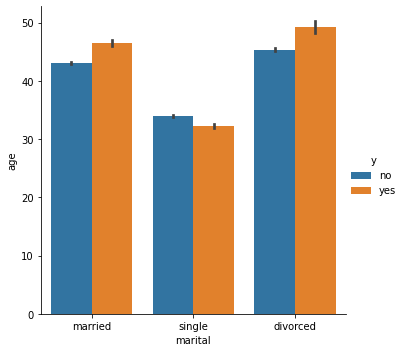

In [181]:
sns.catplot( y="age", x="marital", hue="y", kind="bar",data=bank_df,)

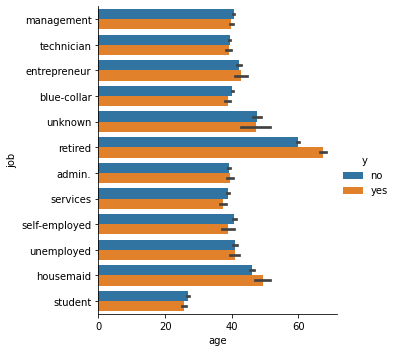

In [182]:
sns.catplot( x="age", y="job", hue="y", kind="bar",data=bank_df,)

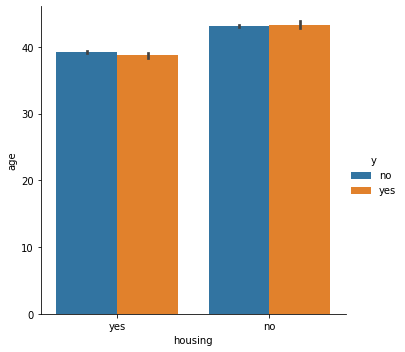

In [183]:
sns.catplot( y="age", x="housing", hue="y", kind="bar",data=bank_df,)

In [175]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


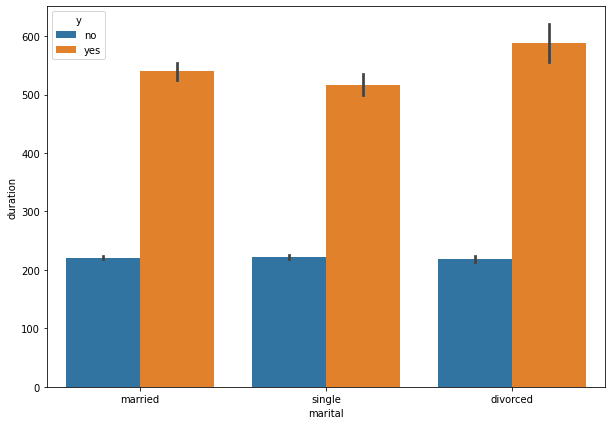

In [185]:
# Adding hue 
plt.figure(figsize=(10,7))
sns.barplot(bank_df['marital'], bank_df['duration'], hue=bank_df['y'])
plt.show()

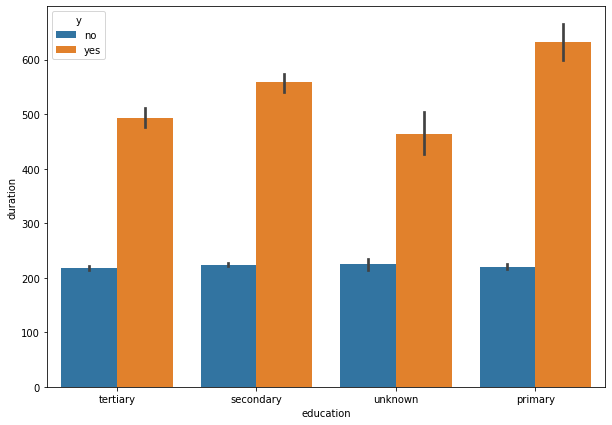

In [186]:
# Adding hue 
plt.figure(figsize=(10,7))
sns.barplot(bank_df['education'], bank_df['duration'], hue=bank_df['y'])
plt.show()

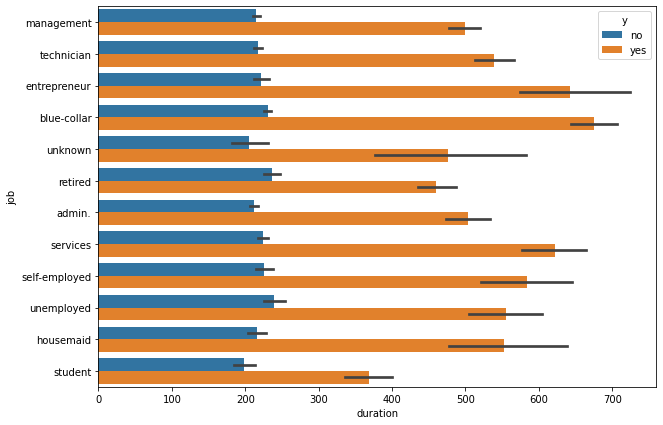

In [188]:
# Adding hue 
plt.figure(figsize=(10,7))
sns.barplot(bank_df['duration'], bank_df['job'], hue=bank_df['y'])
plt.show()

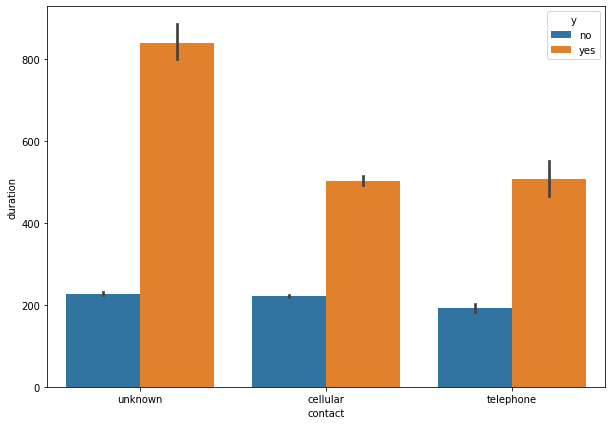

In [189]:
# Adding hue 
plt.figure(figsize=(10,7))
sns.barplot(bank_df['contact'], bank_df['duration'], hue=bank_df['y'])
plt.show()

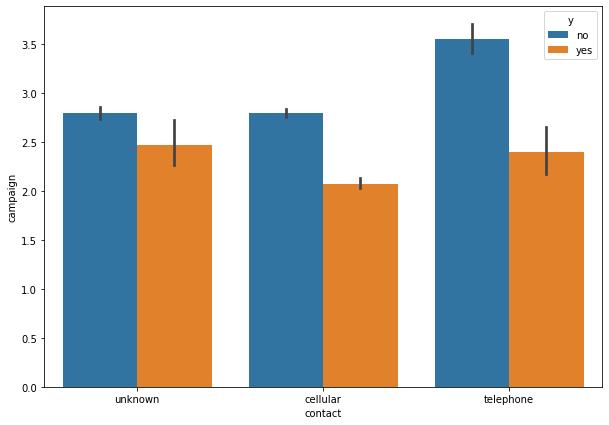

In [190]:
# Adding hue 
plt.figure(figsize=(10,7))
sns.barplot(bank_df['contact'], bank_df['campaign'], hue=bank_df['y'])
plt.show()

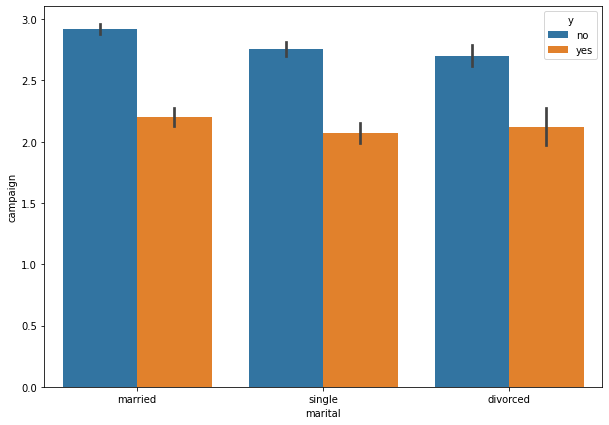

In [191]:
# Adding hue 
plt.figure(figsize=(10,7))
sns.barplot(bank_df['marital'], bank_df['campaign'], hue=bank_df['y'])
plt.show()

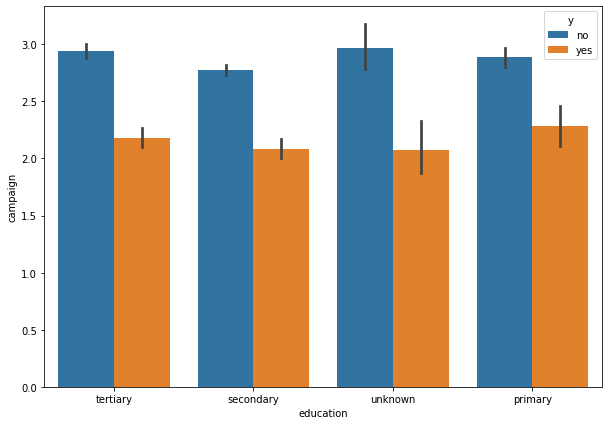

In [192]:
# Adding hue 
plt.figure(figsize=(10,7))
sns.barplot(bank_df['education'], bank_df['campaign'], hue=bank_df['y'])
plt.show()

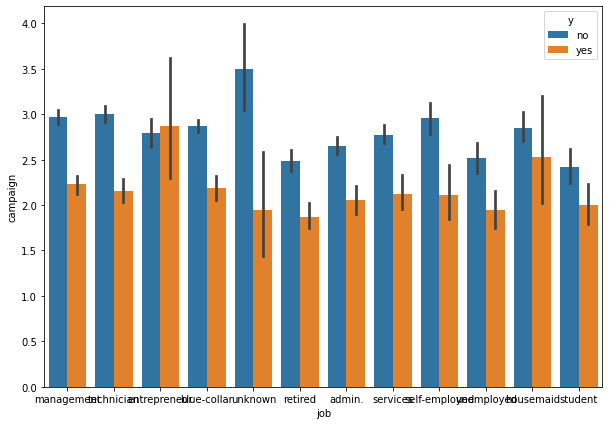

In [193]:
# Adding hue 
plt.figure(figsize=(10,7))
sns.barplot(bank_df['job'], bank_df['campaign'], hue=bank_df['y'])
plt.show()

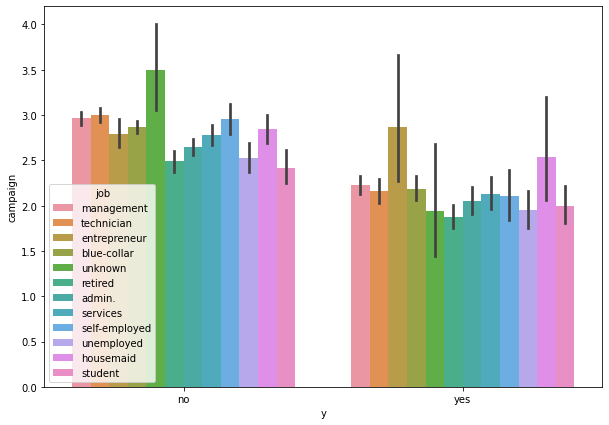

In [194]:
# Adding hue 
plt.figure(figsize=(10,7))
sns.barplot(bank_df['y'], bank_df['campaign'], hue=bank_df['job'])
plt.show()

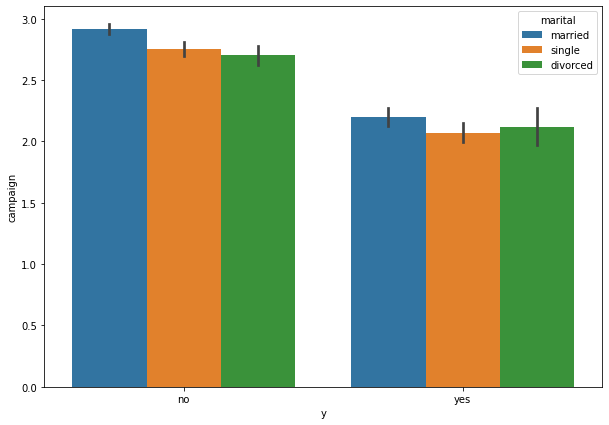

In [195]:
# Adding hue 
plt.figure(figsize=(10,7))
sns.barplot(bank_df['y'], bank_df['campaign'], hue=bank_df['marital'])
plt.show()

In [ ]:
sns.catplot(x="y", y="campaign", hue="marital",
            col="education", aspect=.7,
            kind="swarm", data=bank_df)

In [ ]:
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],